In [1]:
#This notebook is the first part of a demo that aimed to create a model, export it and then


import h2o
import matplotlib as plot
%matplotlib inline

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.211-b12, mixed mode)
  Starting server from c:\users\pasilvacorista\appdata\local\programs\python\python37\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\PASILV~1\AppData\Local\Temp\tmpmoj7i8aa
  JVM stdout: C:\Users\PASILV~1\AppData\Local\Temp\tmpmoj7i8aa\h2o_pasilvacorista_started_from_python.out
  JVM stderr: C:\Users\PASILV~1\AppData\Local\Temp\tmpmoj7i8aa\h2o_pasilvacorista_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,08 secs
H2O cluster timezone:,Europe/London
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.5
H2O cluster version age:,1 month and 6 days
H2O cluster name:,H2O_from_python_pasilvacorista_irfp26
H2O cluster total nodes:,1
H2O cluster free memory:,1.752 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [3]:
url="https://s3.amazonaws.com/h2o-public-test-data/smalldata/junit/cars_20mpg.csv"
data = h2o.import_file(url) 

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
data.summary()

,name,economy,cylinders,displacement,power,weight,acceleration,year,economy_20mpg
type,enum,real,int,real,int,int,real,int,int
mins,,9.0,3.0,68.0,46.0,1613.0,8.0,70.0,0.0
mean,,23.514572864321607,5.475369458128076,194.77955665024626,105.08249999999998,2979.413793103448,15.519704433497527,75.92118226600998,0.5979899497487438
maxs,,46.6,8.0,455.0,230.0,5140.0,24.8,82.0,1.0
sigma,,7.815984312565784,1.7121596315485295,104.92245837948873,38.76877918310518,847.0043282393509,2.8033588163425476,3.7487373454558766,0.49092107939664525
zeros,,0,0,0,0,0,0,0,160
missing,0,8,0,0,6,0,0,0,8
0,AMC Ambassador Brougham,13.0,8.0,360.0,175.0,3821.0,11.0,73.0,0.0
1,AMC Ambassador DPL,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,0.0
2,AMC Ambassador SST,17.0,8.0,304.0,150.0,3672.0,11.5,72.0,0.0


In [5]:
data["economy_20mpg"] = data["economy_20mpg"].asfactor()
column_predict = "economy_20mpg"
columns_training = ["displacement","power","acceleration","year"]

In [6]:
columns_training

['displacement', 'power', 'acceleration', 'year']

In [7]:
train, val, test = data.split_frame(ratios = [0.8,0.1], seed= 123)

In [8]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [9]:
model_gbm= H2OGradientBoostingEstimator(model_id = "gbm"
                  , ntrees = 100 
                  , max_depth = 10
                  , stopping_rounds = 0
                                    )

In [11]:
model_gbm.train(x= columns_training, y=column_predict, training_frame = train, validation_frame = val )

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [12]:
model_gbm.auc(valid=True)


0.9982638888888888

In [13]:
model_gbm.F1(valid=True)

[[0.8031020068650673, 0.9846153846153847]]

In [14]:
model_gbm.confusion_matrix(valid=True)

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8031020068650673: 


,0,1,Error,Rate
0,17.0,1.0,0.0556,(1.0/18.0)
1,0.0,32.0,0.0,(0.0/32.0)
Total,17.0,33.0,0.02,(1.0/50.0)


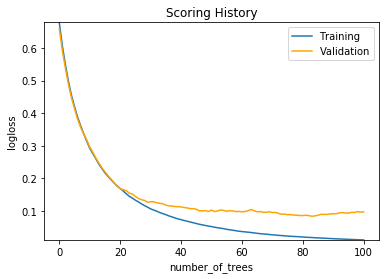

In [15]:
model_gbm.plot()

In [ ]:
model_gbm.model_performance(test)